# Big Data & Cloud Computing

## 2nd Practical Assignment

<p style="text-align:center">
David Capela, up202103909<br>
Rui Fernandes, up202103071
</p>

## Initial Imports

In [25]:
import os
import dask.dataframe as dd
import seaborn as sns

In [ ]:
sns.set()

In [2]:
filename = os.path.join('data', 'EVENTS.csv')

In [24]:
df = dd.read_csv(filename, parse_dates=['CHARTTIME', 'STORETIME'], dtype={
    'CGID': 'Int64','ICUSTAY_ID': 'Int64'
})

In [26]:
df.head(15)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,2.50,2.50,NaN,0,0,NaN,NaN
5,793,36,165660,241249,224331,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,0.00,0.00,ml/hr,0,0,NaN,NaN
6,794,36,165660,241249,224332,2134-05-12 12:00:00,2134-05-12 14:44:00,17525,3.00,3.00,NaN,0,0,NaN,NaN
7,795,36,165660,241249,224663,2134-05-12 12:00:00,2134-05-12 14:44:00,17525,8.00,8.00,NaN,0,0,NaN,NaN
8,796,36,165660,241249,224665,2134-05-12 12:00:00,2134-05-12 14:44:00,17525,1.11,1.11,NaN,0,0,NaN,NaN
9,797,36,165660,241249,220224,2134-05-12 12:35:00,2134-05-12 12:38:00,20889,58.00,58.00,mmHg,1,0,NaN,NaN


## Data Visualization

In [18]:
%matplotlib inline

In [29]:
def plot_icu_historgram(icu_id, dataframe=df):
    res = dataframe[['SUBJECT_ID', 'VALUENUM', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID']]\
        .query('ICUSTAY_ID == {}'.format(icu_id))\
        .compute()
    sns.relplot(x='CHARTTIME', y='VALUENUM', col='ICUSTAY_ID',
                kind='line', legend='full',
                height=8, aspect=2,
                data=res)

/home/rui/BDCC/proj2/venv/lib/python3.10/site-packages/dask/dataframe/io/csv.py:183: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/home/rui/BDCC/proj2/venv/lib/python3.10/site-packages/dask/dataframe/io/csv.py:183: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/home/rui/BDCC/proj2/venv/lib/python3.10/site-packages/dask/dataframe/io/csv.py:183: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/home/rui/BDCC/proj2/venv/lib/python3.10/site-packages/dask/dataframe/io/csv.py:183: DtypeWarning: Columns (8,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
/home/rui/BDCC/proj2/venv/lib/python3.10/site-packages/dask/dataframe/io/csv.py:183: DtypeWarning: Columns (8) have mixed types. S

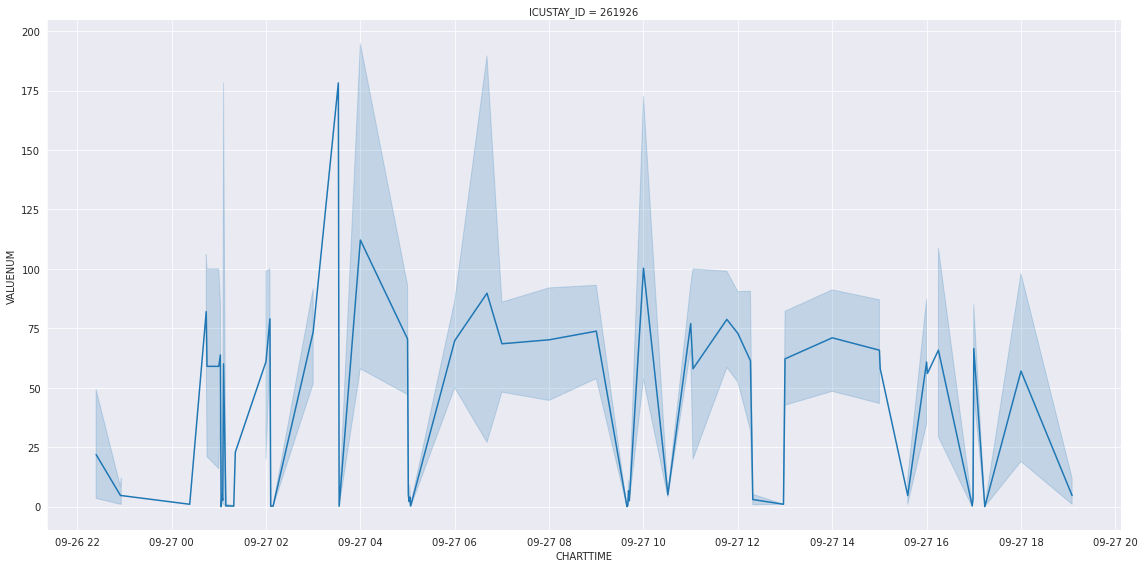

In [30]:
plot_icu_historgram(261926)